In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"D:\archive (7)\Life-Expectancy-Data-Averaged.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


In [3]:
df.isna().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

In [4]:
import seaborn as sns

<Axes: >

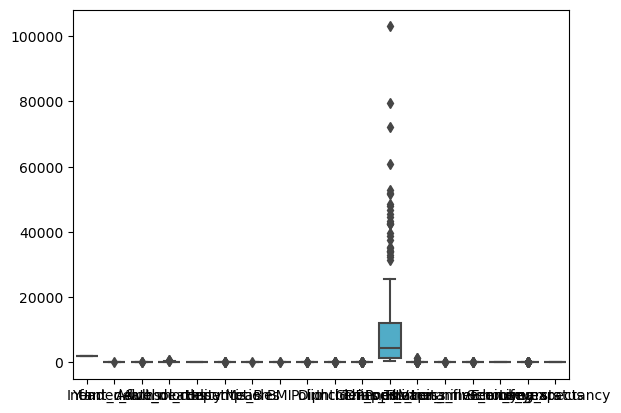

In [5]:
sns.boxplot(df)

## Treating outliers using winzorizing teechnique

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

In [8]:
for i in df:
    if df[i].dtype in ('float64','int64'):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        ll = q1 - 1.5*iqr
        ul = q3 + 1.5*iqr
        df[i].clip(lower = ll, upper = ul, inplace = True)

<Axes: >

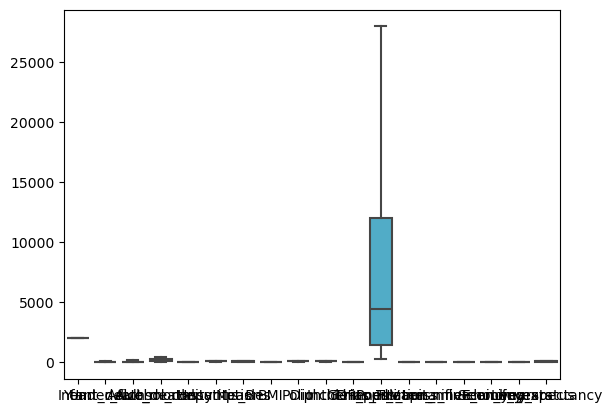

In [9]:
sns.boxplot(df)

# Data Partation

In [10]:
from sklearn.model_selection import train_test_split

In [33]:
a = df.drop(['Country','Region','Year','Economy_status','Under_five_deaths','Adult_mortality','GDP_per_capita','Population_mln','Thinness_ten_nineteen_years','Thinness_five_nine_years','Schooling'],axis =1)

In [34]:
x = a.drop('Life_expectancy', axis = 1)
y = a[['Life_expectancy']]

In [35]:
x_train ,x_test , y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state = 20)

In [36]:
train = pd.concat([x_train, y_train], axis =1)
train.head()

,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Life_expectancy
132,12.90625,10.583750,96.875000,92.875,25.71875,94.750000,95.000000,0.043125,72.88125
147,40.80625,7.313125,75.437500,53.625,26.72500,75.062500,74.125000,1.170625,56.78125
146,98.25625,0.000025,53.984375,64.000,22.62500,57.234375,58.359375,0.130000,53.24375
130,3.63750,11.413125,91.562500,85.000,25.72500,96.500000,97.000000,0.172500,78.74375
37,89.48125,3.206250,70.875000,64.000,21.34375,62.937500,61.000000,0.673125,55.06875


In [37]:
correlation = train.corr()

In [38]:
correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

C:\Users\rajat\AppData\Local\Temp\ipykernel_8544\2104189097.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')


,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,Life_expectancy
Infant_deaths,1.000000,-0.458621,-0.577088,-0.588920,-0.666783,-0.798232,-0.770244,0.643316,-0.929315
Alcohol_consumption,-0.458621,1.000000,0.183872,0.301846,0.224657,0.332930,0.341114,-0.144182,0.418713
Hepatitis_B,-0.577088,0.183872,1.000000,0.533971,0.380943,0.825136,0.845785,-0.283010,0.469202
Measles,-0.588920,0.301846,0.533971,1.000000,0.421925,0.645208,0.614445,-0.405588,0.551728
BMI,-0.666783,0.224657,0.380943,0.421925,1.000000,0.500737,0.439897,-0.429164,0.605648
Polio,-0.798232,0.332930,0.825136,0.645208,0.500737,1.000000,0.982195,-0.455871,0.701310
Diphtheria,-0.770244,0.341114,0.845785,0.614445,0.439897,0.982195,1.000000,-0.443188,0.685429
Incidents_HIV,0.643316,-0.144182,-0.283010,-0.405588,-0.429164,-0.455871,-0.443188,1.000000,-0.753225
Life_expectancy,-0.929315,0.418713,0.469202,0.551728,0.605648,0.701310,0.685429,-0.753225,1.000000


## Multi-Colinearity is present

<Axes: >

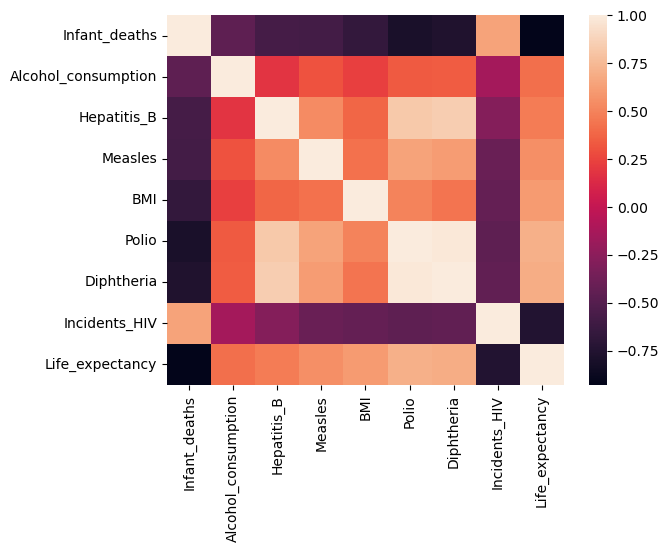

In [39]:
sns.heatmap(correlation)

## Varience Inflation factor

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = a.drop(['Life_expectancy'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

Infant_deaths             5.374239
Alcohol_consumption       3.700617
Hepatitis_B             182.535675
Measles                  37.470908
BMI                      97.388978
Polio                  1910.885101
Diphtheria             1939.523458
Incidents_HIV             3.497574
dtype: float64

## Multi- colinearity is Present in Dataset

## Model Builiding

## Method - Variable selection method

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [42]:
lreg = LinearRegression()

In [43]:
model = sfs(lreg , n_features_to_select= 7, scoring='r2')
model.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=7,
                          scoring='r2')

In [44]:
model.feature_names_in_

array(['Infant_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV'], dtype=object)

In [45]:
model.get_feature_names_out()

array(['Infant_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Incidents_HIV'], dtype=object)

## Method - Sklearn

In [47]:
x_train = x_train.loc[:,['Infant_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Incidents_HIV']]
x_train.head()

,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV
132,12.90625,10.583750,96.875000,92.875,25.71875,94.750000,0.043125
147,40.80625,7.313125,75.437500,53.625,26.72500,75.062500,1.170625
146,98.25625,0.000025,53.984375,64.000,22.62500,57.234375,0.130000
130,3.63750,11.413125,91.562500,85.000,25.72500,96.500000,0.172500
37,89.48125,3.206250,70.875000,64.000,21.34375,62.937500,0.673125


In [48]:
train = pd.concat([x_train, y_train], axis = 1)
train.head()

,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,Life_expectancy
132,12.90625,10.583750,96.875000,92.875,25.71875,94.750000,0.043125,72.88125
147,40.80625,7.313125,75.437500,53.625,26.72500,75.062500,1.170625,56.78125
146,98.25625,0.000025,53.984375,64.000,22.62500,57.234375,0.130000,53.24375
130,3.63750,11.413125,91.562500,85.000,25.72500,96.500000,0.172500,78.74375
37,89.48125,3.206250,70.875000,64.000,21.34375,62.937500,0.673125,55.06875


In [49]:
model3 = LinearRegression()

In [50]:
model3.fit(x_train, y_train)

LinearRegression()

In [52]:
np.round(model3.intercept_,2)    # B0

array([85.74])

In [53]:
np.round(model3.coef_,3)    # B1

array([[-0.272,  0.072, -0.041,  0.009, -0.101, -0.017, -6.229]])

In [54]:
model3.feature_names_in_

array(['Infant_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Incidents_HIV'], dtype=object)

## Prediction on train

In [56]:
train['fitted'] = np.round(model3.predict(x_train),2)

In [58]:
train['residual'] = np.round(train.Life_expectancy - train.fitted,2)

In [59]:
train.head()

,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,Life_expectancy,fitted,residual
132,12.90625,10.583750,96.875000,92.875,25.71875,94.750000,0.043125,72.88125,75.36,-2.48
147,40.80625,7.313125,75.437500,53.625,26.72500,75.062500,1.170625,56.78125,61.28,-4.50
146,98.25625,0.000025,53.984375,64.000,22.62500,57.234375,0.130000,53.24375,53.35,-0.11
130,3.63750,11.413125,91.562500,85.000,25.72500,96.500000,0.172500,78.74375,77.25,1.49
37,89.48125,3.206250,70.875000,64.000,21.34375,62.937500,0.673125,55.06875,51.91,3.16


In [60]:
from sklearn.metrics import r2_score

In [61]:
r2 = r2_score(train.Life_expectancy , train.fitted)

In [65]:
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  91.0


In [85]:
from sklearn.metrics import mean_squared_error

In [87]:
model_mse= mean_squared_error(train['Life_expectancy'], train['fitted'])
model_rmse = np.sqrt(model_mse)
model_rmse

2.791176685109704

## Assumption of Linear Regression

### 1.Linearity

<Axes: xlabel='Hepatitis_B', ylabel='Life_expectancy'>

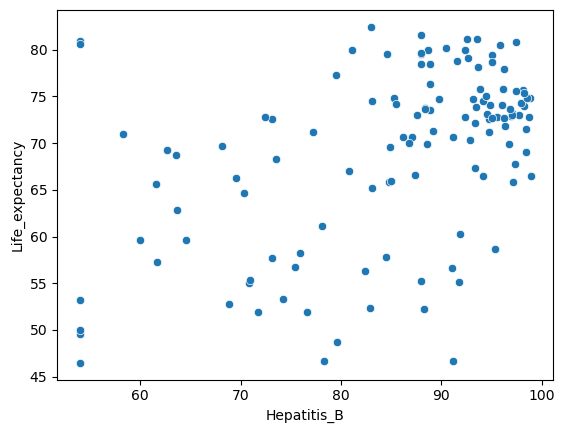

In [103]:
sns.scatterplot(x='Hepatitis_B', y = 'Life_expectancy', data = train )

<Axes: xlabel='fitted', ylabel='residual'>

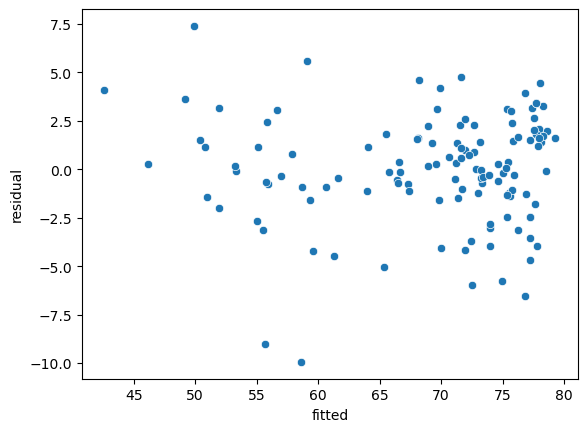

In [71]:
sns.scatterplot(x='fitted', y='residual',data=train)

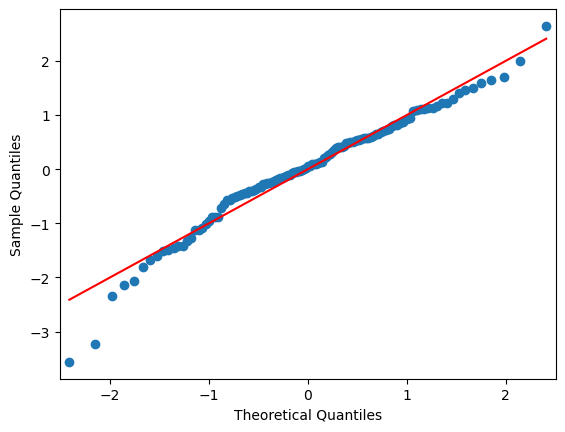

In [73]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

C:\Users\rajat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual', ylabel='Count'>

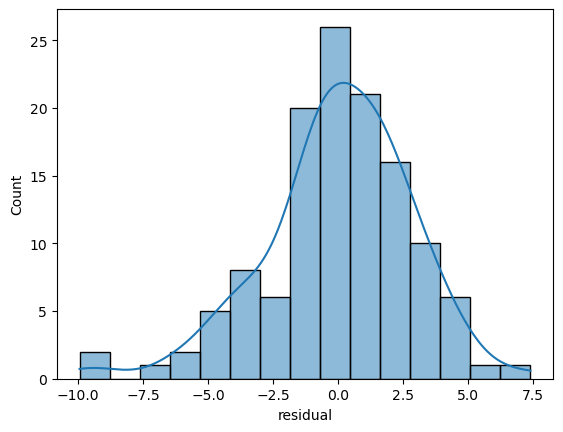

In [84]:
sns.histplot(x ='residual', data = train, kde= True)

## Prediction on Test

In [88]:
model3.feature_names_in_

array(['Infant_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Incidents_HIV'], dtype=object)

In [89]:
x_test = x_test.loc[:,['Infant_deaths', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Incidents_HIV']]

In [90]:
test = pd.concat([x_test, y_test], axis = 1)
test.head()

,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,Life_expectancy
112,53.80000,0.799375,75.6250,68.9375,21.91250,85.875,0.408750,62.70000
100,16.68750,1.529375,97.8750,81.5625,24.20000,97.875,0.170000,74.51250
46,66.98750,0.665625,86.3125,82.0000,23.77500,74.875,0.856250,59.48750
113,38.98750,2.015000,84.2500,64.0000,23.56875,83.000,1.170625,54.87500
92,72.21875,2.623750,86.6250,70.4375,24.48750,87.750,1.170625,45.60625


In [92]:
test['fitted'] = np.round(model3.predict(x_test),2)

In [93]:
test['residual'] = np.round(test.Life_expectancy - test.fitted,2)

In [94]:
test.head()

,Infant_deaths,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Incidents_HIV,Life_expectancy,fitted,residual
112,53.80000,0.799375,75.6250,68.9375,21.91250,85.875,0.408750,62.70000,62.47,0.23
100,16.68750,1.529375,97.8750,81.5625,24.20000,97.875,0.170000,74.51250,72.85,1.66
46,66.98750,0.665625,86.3125,82.0000,23.77500,74.875,0.856250,59.48750,55.78,3.71
113,38.98750,2.015000,84.2500,64.0000,23.56875,83.000,1.170625,54.87500,61.31,-6.44
92,72.21875,2.623750,86.6250,70.4375,24.48750,87.750,1.170625,45.60625,52.12,-6.51


In [95]:
test_r2 = r2_score(test.Life_expectancy, test.fitted)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  91.0


In [96]:
test_model_mse = mean_squared_error(test.Life_expectancy, test.fitted)

In [98]:
test_model_rmse = np.sqrt(test_model_mse)
print("RMSE of Test Data : ",np.round(test_model_rmse,2)) #21

RMSE of Test Data :  3.02
